# Pandemic Flu Spread Using “Green” Simulation Method for Small Sample of Elementary Students 

This paper studies a pandemic flu spread case applying a “green” simulation method, using pseudo-random numbers as presented in the paper by Wilson S., Alabdulkarim A. and Goldsman D.  W, [“Green Simulation of Pandemic Disease Propagation”](http://www.math.uwaterloo.ca/~mbfeng/papers/GreenSimWSC.pdf) in a simulation environment build in Python. The scenario is an elementary school with twenty-one kids and the impact of infection when one infected kid enters the system. The findings and answers to the questions are presented at the end of the paper


In [3]:
#hide
import numpy as np
import pandas as pd
import random

# probability update function
def pandemic (n, k, p ):
#n number of students, k number of days and p probability

    def p_infected(q, q_t_1):
        out= 1 - q **(q_t_1)
        #print(out)
        return round(out,5)

    # Number of susceptibles 
    #n = 21
    ## Number of days
    #k = 30
    U = np.random.uniform(0,1,n)
    #print(U)
    #infected Io =1 
    Io=1
    #gama rate of infection
    gama=1/3
    #probability of infection p Bernoulli original at p=0.02 testing with 0.2
    #p=0.02
    q=1-p
    #q=beta/gama
    po=1.0-q**Io
    po
    countPRN=0
    # Create a list of days length k
    days = np.arange(1,n+1)
    probs = np.zeros(n)
    probs[0] = p
    ## Initial state and PRN
    state = np.empty(n, dtype=object)
    prn = np.random.uniform(0,1,n)
    state[:] = 'S'
    # Metadata to count days infected
    t_infected = np.zeros(n)
    # Generate random Infected'
    infected_idx = random.randint(0,n-1)
    state[infected_idx] = 'I'
    t_infected[infected_idx] = 0
    days_sim = list()
    days_sim.append(pd.DataFrame(data= {'prn': prn, 'state': state, 't_infected': t_infected}))

    #print(days_sim)

    summary_df = pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                                     'probability':[], 'count_prn':[] })
    last_recovered = pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                                     'probability':[], 'count_prn':[] })

    for d in range(1,k):
        # Get initial data
        prn = np.zeros(n)
        #prn = np.random.uniform(0,1,m)
        prev_df = days_sim[d-1]

        state = prev_df['state'].copy()
        t_inf = prev_df['t_infected'].copy()

    #     print('==================  Day', d, '======================') 
    #     print('p:', p)
    #     print('Infected:', m)
    #     print('Susceptible:', s_i)
    #     print('Removed:', r_i)
    #     print('m:', m)

        #print(state)
        # Simulate current day
        for index,rand in enumerate(prn):
            # If student is infected, then check how many days he has been infected
            # if it's less than 3 then increase the count, else move him to state R
            # and leave the count as is (it will no longer be used)

            if state[index] == 'I':
                if t_inf[index] < 3:
                    t_inf[index] = t_inf[index] + 1
                else:
                    state[index] = 'R'

            # Else if the student is still sucseptible       
            elif state[index] =='S':
                countPRN=countPRN+1
                prn[index] = random.uniform(0,1)
                if prn[index] < p:
                    state[index] = 'I'
                    t_inf[index] = 1
                    
        #updating p
        #print('prn:', prn)
        #print('state:', list(state))
        m = len(state[state == 'I'])
        p = p_infected(q, m)
        s_i = len(state[state == 'S'])
        r_i = len(state[state == 'R'])
        metrics = {'day': int(d),'infected':int(m), 'susceptible':int(s_i),'recovered':int(r_i), 'probability':p, 'count_prn':countPRN } 
       # metrics = {'day': [d],'infected':[m], 'susceptible':[s_i],'recovered':[r_i], 'probability':[p], 'prn':[countPRN] } 
        summary_df = summary_df.append(metrics, ignore_index = True)
        #print(summary_df)
        if r_i == n:
            print (f'All {r_i} removed: in day {d}')
            break

    #     print('==================  Day', d, '======================') 
    #     print('p:', p)
    #     print('Infected:', m)
    #     print('Susceptible:', s_i)
    #     print('Removed:', r_i)
        #print(pd.DataFrame(data= {'prn': prn, 'state': state, 't_infected': t_inf}))
        days_sim.append(pd.DataFrame(data= {'prn': prn, 'state': state, 't_infected': t_inf}))        
    #print(summary_df)
    last_recovered= last_recovered.append(metrics, ignore_index = True)
    return summary_df, last_recovered
    #return metrics


In [4]:
# This code creates the replications
replications=100
kids=21
days=30
p=0.02
#initializes the data frame of replications
summary_df_replications = pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                                     'probability':[], 'count_prn':[] })
#initializes the list of last recovered which I will be saving in a data frame for every iteration
summary_last_recovered=summary_df_replications

mean_per_day =pd.DataFrame(data= {'day':[], 'infected':[], 'susceptible':[],'recovered':[],
                           'probability':[], 'count_prn':[] })

#runs every iteration
for i in range (0, replications):
    metrics_result, info_last_recovered = pandemic (kids, days+1, p )
    #n number of students, k number of days and p probability
    #in this case 21 students with a lenght of 365 days and probability of 0.02
    
    #creates a single data frame for all replications
    summary_df_replications=pd.concat([summary_df_replications, pd.DataFrame(data=metrics_result)])
    #creates a single data frame for all replications last recovered
    summary_last_recovered=pd.concat([summary_last_recovered, pd.DataFrame(data=info_last_recovered)])
    

All 21 removed: in day 12


In [5]:
#calcuates the day that there is are no longer infections
def getDayNoInfection(df, infected='infected'):
    counter = 0
    index = 0
    #print(df.head())
    for index,d in df.iterrows():        
        if d[infected] == 0:
            counter = counter + 1
            if counter == 0:
                index = d['day']
        if counter >= 3:
            break
    return index-1
def getDaysOfNoInfectionsMean(df):
    days_change = []
    for i in range(replications):
        day = getDayNoInfection(df[i*60: i*60 + 60])
        days_change.append(day)
    out= sum(days_change)/len(days_change)
    #print(out)
    return (out, days_change)
    
last_infected= getDaysOfNoInfectionsMean(summary_df_replications)
    #print(counter)   

In [6]:
###### This code is to check the outputs ###
#show the table of summary_df_replications
#print(summary_df_replications[0:days])
print ("Table of Replications")
display(summary_df_replications)


#testing to see the tail of the entire dataframe
#print (summary_df_replications.tail())
#test to see data from the daya of last recovered
print ("Last Day of The Iteration per Replication")
display(summary_last_recovered)


Table of Replications


,day,infected,susceptible,recovered,probability,count_prn
0,1.0,2.0,19.0,0.0,0.03960,20.0
1,2.0,3.0,18.0,0.0,0.05881,39.0
2,3.0,5.0,16.0,0.0,0.09608,57.0
3,4.0,4.0,15.0,2.0,0.07763,73.0
4,5.0,4.0,14.0,3.0,0.07763,88.0
...,...,...,...,...,...,...
25,26.0,0.0,5.0,16.0,0.00000,234.0
26,27.0,0.0,5.0,16.0,0.00000,239.0
27,28.0,0.0,5.0,16.0,0.00000,244.0
28,29.0,0.0,5.0,16.0,0.00000,249.0


Last Day of The Iteration per Replication


,day,infected,susceptible,recovered,probability,count_prn
0,30.0,0.0,9.0,12.0,0.0,328.0
0,30.0,0.0,20.0,1.0,0.0,600.0
0,30.0,0.0,20.0,1.0,0.0,600.0
0,30.0,0.0,3.0,18.0,0.0,254.0
0,30.0,0.0,10.0,11.0,0.0,339.0
...,...,...,...,...,...,...
0,30.0,0.0,19.0,2.0,0.0,572.0
0,30.0,0.0,7.0,14.0,0.0,276.0
0,30.0,0.0,8.0,13.0,0.0,282.0
0,30.0,0.0,20.0,1.0,0.0,600.0


In [7]:
summary_last_recovered.mean()

day             29.82
infected         0.00
susceptible     13.44
recovered        7.56
probability      0.00
count_prn      440.23
dtype: float64

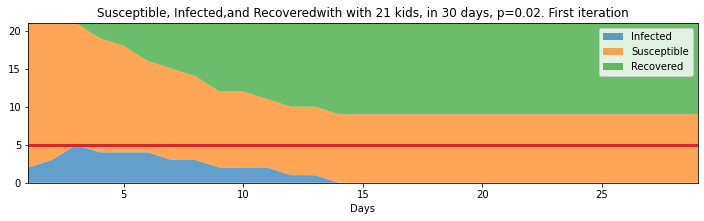

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12, 10))

########## Plotting the first iteration #################
ax = [fig.add_subplot(311, axisbelow=True)]

pal = sns.color_palette("tab10")
max_infected=max(summary_df_replications["infected"][0:days])
#top plot
ax[0].stackplot(summary_df_replications["day"][0:days],
                summary_df_replications["infected"][0:days],
                summary_df_replications["susceptible"][0:days],
                summary_df_replications["recovered"][0:days],
                colors=pal, alpha=0.7)
ax[0].set_title(f'Susceptible, Infected,and Recoveredwith with {kids} kids, in {days} days, p={p}. First iteration')
ax[0].set_xlabel('Days')
ax[0].legend([
    'Infected', 
    'Susceptible', 
    'Recovered'], 
    loc='best')
ax[0].set_xlim(1, days-1)
ax[0].set_ylim(0, kids)

#this plots a line with the max infected
ax[0].annotate("Max infected(%.2f)"%(max_infected),
    (0, max_infected),(0+3, max_infected+3), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].plot(np.array([0, days-1]), [max_infected, max_infected], lw=3, label='Max Infected')



In [9]:
summary_df_replications_Table= summary_df_replications.rename(columns={"day": "Day","infected":"Infected", "susceptible":"Susceptible",
                                                                       "recovered":"Removed","probability": "Probability", 
                                                                       "count_prn": "Cumulative PRNs" } )
#summary_df_replications_Table.iloc[0:int(last_infected)]
#type summary_df_replications_Table = summary_df_replications_Table.astype({"Day": int, "Infected": int}) 

In [10]:
##################### Calculating the Means for each day ####################
#calculates the mean per replications
#not correcto start
mean_replications = pd.DataFrame(summary_last_recovered.mean(axis=0)).T
mean_replications
# not correcto end

#mean of first iteration
#print(summary_df_replications["infected"][0:days].mean())

#mean of the day 1 
#print(f'Mean of day 1 :{summary_df_replications["infected"][0].mean()}')

#mean of all days 1
mean_of_days_infected=[]
mean_of_days_susceptible=[]
mean_of_days_removed=[]

#calculating the variance per day
var_of_days_infected=[]
var_of_days_susceptible=[]
var_of_days_removed=[]

#creating a table only for the infected values 
#if the mean is taking for all of the days including the 0 the mean will also include zero values

#set the range of the days

x=range(1,days)

for i in range(0,days-1):
    mean_of_days_infected.append(summary_df_replications["infected"][i].mean())
    mean_of_days_susceptible.append(summary_df_replications["susceptible"][i].mean())
    mean_of_days_removed.append(summary_df_replications["recovered"][i].mean())
    #for the variance
    var_of_days_infected.append(summary_df_replications["infected"][i].var())
    var_of_days_susceptible.append(summary_df_replications["susceptible"][i].var())
    var_of_days_removed.append(summary_df_replications["recovered"][i].var())
    
    #print(summary_df_replications["infected"][i].mean())

#print(f'mean of each day {mean_of_days_infected}')
dataframe_means= pd.DataFrame(data={'Day':x,
                                    'mean_per_day_infected':mean_of_days_infected,
                                    'mean_of_days_susceptible':mean_of_days_susceptible,
                                    'mean_of_days_removed':mean_of_days_removed})
#creates a dataframeof the variances
dataframe_variance=pd.DataFrame(data={'Day':x,
                              'Variance per day Infected':var_of_days_infected,
                              'Variance per day Susceptible':var_of_days_susceptible,
                              'Variance per day Recovered':var_of_days_removed} )

In [11]:
#Calculates the day that there is not more infected from the means of each replications
last_infected_mean= getDayNoInfection(dataframe_means,'mean_per_day_infected')
print(f'Day that no more kids gets infected {last_infected_mean}th day')
dataframe_means
print()
mean_days, array_days= getDaysOfNoInfectionsMean(summary_df_replications)
End_total_infection = summary_df_replications[summary_df_replications["infected"]<1]
#End_total_infection[]
#getDaysOfNoInfectionsMean(summary_df_replications)

Day that no more kids gets infected 23th day



2.84


Text(0, 0.5, 'Expected Value and Variance of Infected')

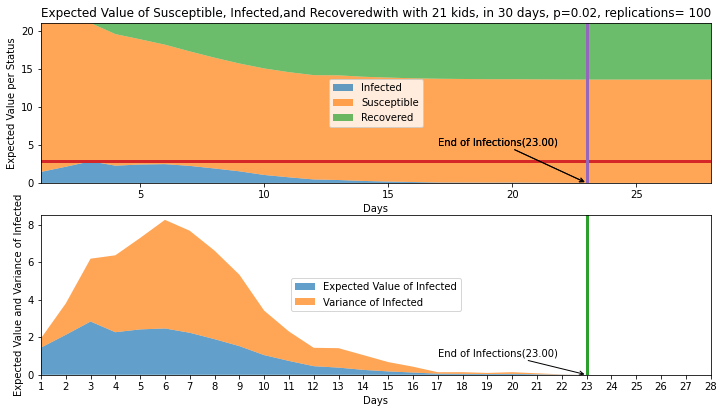

In [12]:


#this plots the info in a stack
fig = plt.figure(figsize=(12, 10))
ax = [fig.add_subplot(311, axisbelow=True),
      fig.add_subplot(312, axisbelow=True)]

plt.xticks(np.arange(min(x), max(x)+1, 1.0))

max_infected_means=max(dataframe_means["mean_per_day_infected"][0:days])
print(max_infected_means)
ax[0].stackplot(dataframe_means["Day"][0:days],
                dataframe_means["mean_per_day_infected"][0:days],
                dataframe_means["mean_of_days_susceptible"][0:days],
                dataframe_means["mean_of_days_removed"][0:days],
                colors=pal, alpha=0.7)

ax[0].set_title(f'Expected Value of Susceptible, Infected,and Recoveredwith with {kids} kids, in {days} days, p={p}, replications= {replications}')
ax[0].set_xlabel('Days')
ax[0].set_ylabel('Expected Value per Status')
ax[0].legend([
    'Infected', 
    'Susceptible', 
    'Recovered'], 
    loc='center')
ax[0].set_xlim(1, days-2)

ax[0].set_ylim(0, kids)

#this plots a line with the max infected
ax[0].annotate("Max infected(%.2f)"%(max_infected_means),
    (0, max_infected_means),(0+3, max_infected_means+3), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].plot(np.array([0, days-1]), [max_infected_means, max_infected_means], lw=3, label='Max Infected Means')


#this plots a line with the last day infected
ax[0].annotate("End of Infections(%.2f)"%(last_infected_mean),
    (last_infected_mean, 0),(last_infected_mean-6, 0+5), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].annotate("End of Infections(%.2f)"%(last_infected_mean),
    (last_infected_mean, 0),(last_infected_mean-6, 0+5), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[0].plot(np.array([last_infected_mean,last_infected_mean]), [0, kids], lw=3, label='Last Infected Means')



#############################################################################################
#This plot is for the infected on the sencond part 
ax[1].set_xlim(1, days-2)
ax[1].set_ylim(0, max_infected_means*3)

ax[1].stackplot(x,
                dataframe_means["mean_per_day_infected"][0:days-1],
                dataframe_variance["Variance per day Infected"][0:days-1],
                colors=pal, alpha=0.7)
ax[1].legend([
    'Expected Value of Infected', 
    'Variance of Infected'], 
    loc='center')
#this plots a vertical line of end of infection in plot 2
ax[1].annotate("End of Infections(%.2f)"%(last_infected_mean),
    (last_infected_mean, 0),(last_infected_mean-6, 0+1), 
               #(max_infected, max_infected),
    arrowprops=dict(arrowstyle='->'))
ax[1].plot(np.array([last_infected_mean,last_infected_mean]), [0, kids], lw=3, label='Last Infected Means')

#sets x title
ax[1].set_xlabel('Days')
ax[1].set_ylabel('Expected Value and Variance of Infected')


In [13]:
from scipy import stats

#[dataframe_means["mean_per_day_infected"],
#dataframe_variance["Variance per day Infected"]]

#testing how to run the chi squuare
Xnot=chisquare([179, 208, 222, 199, 192])
#Cacluclates the Chi square passing 1- alph, degrees of freedom
Xalpha = stats.chi2.ppf(q=0.95, df=4)
print(Xnot,Xalpha)

# for the project

Xnot=chisquare(summary_df_replications["infected"])
#Cacluclates the Chi square passing 1- alph, degrees of freedom
k_observation=len(summary_df_replications["infected"])
print(k_observation)
Xalpha = stats.chi2.ppf(q=0.95, df=k_observation-1)
print(Xnot,Xalpha)
phat=.476
x=2
70*(1-phat)**(x-1)*phat
(1-phat)**(x-1)*phat

NameError: name 'chisquare' is not defined

In [ ]:
summary_last_recovered.head(5)

In [ ]:
#mean of replications at the end of each replication
print(summary_last_recovered)
results_replications_mean =pd.DataFrame(summary_last_recovered.mean()).T

results_replications_mean_SIR= results_replications_mean.rename(columns={"day": "Day",
                                                                         "infected":"Total Expected Infected",
                                                                         "susceptible":"Total Expected Susceptible",
                                                                       "recovered":"Total Expected Removed",
                                                                         "probability": "Probability", 
                                                                       "count_prn": "Cumulative PRNs" } )
results_replications_mean_SIR["Total Expected Infected"]=results_replications_mean_SIR["Total Expected Removed"]
results_replications_mean_SIR["Variance Infected"]=0
#comparing the value if rounded
display(round(results_replications_mean_SIR))
#not rounded
display(results_replications_mean_SIR)
display(summary_last_recovered.var())


In [ ]:
#Calculating the confidndence interval of independent replications
import statistics 
sample=summary_last_recovered["recovered"]
print(len(sample))
Zrbar= statistics.mean(sample)
print(Zrbar)
Sz_variance=statistics.variance(sample, xbar=Zrbar)
print(Sz_variance)
#1-stats.t.cdf(0.95,df=1)
#enter the percentage to calculate the left side 90% equal to 10% in the regular table
#np.sqrt(4)
CILow=Zrbar - stats.t.ppf(0.975, df=len(sample)-1)*np.sqrt(Sz_variance/len(sample))
CIHigh =Zrbar + stats.t.ppf(0.975, df=len(sample)-1)*np.sqrt(Sz_variance/len(sample))
print(CILow,CIHigh)

In [ ]:


summary_dataframe_means_Table= dataframe_means.rename(columns={"day": "Day","mean_per_day_infected":"Expected Value of Infected ",
                                                               "mean_of_days_susceptible":"Excpected Value of Susceptibles",
                                                                       "mean_of_days_removed":"Expected Value of Removed"} )
dataframe_means
summary_dataframe_means_Table

In [ ]:
summary_dataframe_means_Table_SIR=summary_dataframe_means_Table
del summary_dataframe_means_Table_SIR["Day"]
summary_dataframe_means_Table.hist(figsize = (12,10))
#(summary_dataframe_means_Table[["Day", "Expected Value of Infected"]]).hist(column='Expected Value of Infected', bins=days,figsize=(8,4), grid=True,rwidth=0.9)


In [ ]:
#Juan Carlos check the day of the mean of per replications when no more infections 
#Same as the mean olf how long the pandemic last
print(f'Day that no other kid gets infected = {summary_df_replications["infected"].lt(1).argmax()}th day')

#summary_df_replications[summary_df_replications["infected"][:]>0].iloc[0:20].mean()
#summary_df_replications_greater_zero["infected"][1].mean()
#summary_df_replications.iloc[16:30]


In [ ]:
# print ("Table of Means per day with infected value greater than 0")
# display(dataframe_means[dataframe_means["mean_per_day_infected"][:]>0])

# print ("Table of Means  of the Means For all Iteration")
# display(dataframe_means[dataframe_means["mean_per_day_infected"][:]>0].mean())


In [ ]:
############## Calculating the Distribution for Day 1  Part a ################
#Number of infected on day 0 for each replcation
Infected_Day_1 = summary_df_replications["infected"][0].iloc[0:1000]
#print(Infected_Day_1)
Infected_Day_1.hist( figsize=(10,4),grid=True).set_xlabel('Number of Infected on Day 1')
Infected_Day_1.hist( ).set_ylabel('Frequency')

In [ ]:
#we are assumning that is a an exponential doing goodness of fit for an exponential with 
Ei=summary_df_replications["infected"][0].mean()
Oi=summary_df_replications["infected"][0].iloc[0:1000].value_counts()
print(f'Ei = {Ei}')
print('Observations')
print(Oi)
#this is incorrect
Xnot=chisquare(summary_df_replications["infected"][0])
#this is correct
Xnot2=chisquare(Oi)
#Cacluclates the Chi square passing 1- alph, degrees of freedom
Xalpha = stats.chi2.ppf(q=0.95, df=len(Oi)-1-1)
#print(Xnot, Xalpha)
print('Xnot with stats package')
print(Xnot2 )
print('X alpha')
print(Xalpha)
print(len(summary_df_replications["infected"][0]))

In [ ]:
#this is for the 1000
Oi=summary_df_replications["infected"][0].value_counts()
#testing first 100
Xnot_list=[]
Xbar_list=[]
Xalpha_list=[]
degrees=[]
nlist=[]
Geometric_per_replication=[]
#30 days ends the replication
window=60
for rep in range(1,int(990/window)-1):
    Oi=summary_df_replications["infected"][0].iloc[(rep-1)*window:window*rep].value_counts()
    OiList=np.array(Oi)
    print(OiList)
    index=list(range(1,len(OiList)+1)) #[1,2,3,4,5]
    print(index)
    n=sum(OiList)
    print(OiList*index)
    sumXi=sum(OiList*index)
    #testing with out muliplying it for the index equal to X
    #sumXi=sum(OiList)

    Xbar=sumXi/n
    phat=1/Xbar
    print(f'Phat = {phat} Xbar = {Xbar}')
    PGeometric=[]
    #phat=.476
    for x in range(1,len(index)):
        PGeometric.append(((1-phat)**(x-1))*phat)
    PGeometric.append(1-sum(PGeometric))
    PGeometric
    #n=70
    nx=np.ones(len(index))*n
    print(nx)
    Ex= PGeometric*nx
    print(f'Ex = {sum(Ex)}')
    #OiList=[34,18,2,9,7]
    Ex_OiList= Ex-OiList
    Xnot= sum(Ex_OiList**2/Ex)
    Xalpha = stats.chi2.ppf(q=0.95, df=len(Oi)-1-1)
    Xnot_list.append(Xnot)
    Xbar_list.append(Xbar)
    Xalpha_list.append(Xalpha)
    nlist.append(n)
    degrees.append(len(Oi)-1-1)
    Geometric_per_replication.append([PGeometric, Ex, Oi])
print(f'Xnot = {Xnot}')
#Xalpha()
print(sum(PGeometric))
pd.DataFrame(data={'P(X=x)':PGeometric, 'Ex':Ex, 'Ox':Oi})
Xalpha = stats.chi2.ppf(q=0.95, df=len(Oi)-1-1)
print(f'Xalpha = {Xalpha}')
pd.DataFrame(data={'P(X=x)':PGeometric, 'Ex':Ex, 'Ox':Oi})

In [ ]:
Geometric_per_replication

In [ ]:
pd.DataFrame(Xnot_list).hist( )
pd.DataFrame(Xbar_list).hist( )
pd.DataFrame(Xbar_list).mean()
#print(Xbar_list)
#print('xxxx')
#print(Xnot_list)
Goodness = pd.DataFrame(data={'Xnots':Xnot_list, 'Exs':Xbar_list, 
                              'Xalphas':Xalpha_list, 
                              'n':nlist,
                              'Degrees of Freedom':degrees})
Goodness["Xnot<Xalpha"]=Goodness['Xnots']<Goodness['Xalphas']
Goodness

In [ ]:
#this is for the 1000
Oi=summary_df_replications["infected"][0].iloc[0:500].value_counts()
#testing first 100
#Oi=summary_df_replications["infected"][0].head(200).value_counts()
OiList=np.array(Oi)
print(OiList)
index=list(range(1,len(OiList)+1)) #[1,2,3,4,5]
print(index)
n=sum(OiList)
print(OiList*index)
sumXi=sum(OiList*index)
#testing with out muliplying it for the index equal to X
#sumXi=sum(OiList)

Xbar=sumXi/n
phat=1/Xbar
print(f'Phat = {phat} Xbar = {Xbar}')
PGeometric=[]
#phat=.476
for x in range(1,len(index)):
    PGeometric.append(((1-phat)**(x-1))*phat)
PGeometric.append(1-sum(PGeometric))
PGeometric
#n=70
nx=np.ones(len(index))*n
print(nx)
Ex= PGeometric*nx
print(f'Ex = {Ex}')
print(f'Ox = {OiList}')
#OiList=[34,18,2,9,7]

Ex_OiList= Ex-OiList
#print(Ex_OiList)
print(f'Ex - Ox = {Ex_OiList}')
print(f'[Ex - Ox]^2 = {Ex_OiList**2}')
print(f'[Ex - Ox]^2/Ex = {(Ex_OiList**2)/Ex}')
print(f' Sum [Ex - Ox]^2/Ex = {sum((Ex_OiList**2)/Ex)}')

Xnot= sum(Ex_OiList**2/Ex)
print(f'Xnot = {Xnot}')
#Xalpha()
print(sum(PGeometric))
pd.DataFrame(data={'P(X=x)':PGeometric, 'Ex':Ex, 'Ox':Oi})
Xalpha = stats.chi2.ppf(q=0.95, df=len(Oi)-1-1)
print(f'Xalpha = {Xalpha}')
Table=pd.DataFrame(data={'P(X=x)':PGeometric, 'Ex':Ex, 'Ox':Oi})
Table_add=Table.iloc[3]+Table.iloc[4]
#adding tables so the last index includes 4 and 5
Adding_Tables=pd.concat([Table.head(3), pd.DataFrame(Table_add).T])
Ex_OiList=Adding_Tables["Ex"]-Adding_Tables["Ox"]
print(Ex_OiList)
Xnot= sum(Ex_OiList**2/Adding_Tables["Ex"])
Xalpha = stats.chi2.ppf(q=0.95, df=len(Adding_Tables)-1-1)
print(f'Xnot = {Xnot}')
print(f'Xalpha = {Xalpha}')

In [ ]:
sum(Ex)==sum(OiList)
stats.chi2.ppf(q=0.95, df=2)
len(Adding_Tables)

In [ ]:
summary_df_replications["infected"][0].iloc[30:60]


In [ ]:
#calculating the baoundaries using exponential
import numpy as np
a=[]
Xbar=Ei
k=4
p=1/k
#for exponential
for i in range(1,k):
    a.append(round(Xbar*(-1*np.log(1-i/k) ),0))
print(a)
#Infected_Day_1["groups"]=
Infected_Day_2=pd.DataFrame()
Infected_Day_2["infected"] = summary_df_replications["infected"][0]
print(Infected_Day_2.head())
Infected_Day_2["group"]=pd.cut(summary_df_replications["infected"][0],bins = a)
Oi3=[Infected_Day_2["group"].value_counts(),len(Infected_Day_2)-661-272]
Oi3=[661,272,67]
Oi3
Xnot3=chisquare(Oi3)
Xnot3

In [ ]:
#using a sample from the total population of infected
sample_infected = random.sample(list(Infected_Day_1), 200)
k=3
Ei2=len(sample_infected)/k
print(Ei2)
Oi=pd.DataFrame(sample_infected)
Oi=Oi[0].value_counts()
print(Oi)
Oi_lenEi=Oi-Ei2
print(Oi_lenEi**2/Ei2)
sum(Oi_lenEi**2/Ei2)
sum(Oi)


In [ ]:
#Calculating Chi square manually

sum((Oi-len(Infected_Day_1)/k)**2/len(Infected_Day_1)/k)
Ei2=len(Infected_Day_1)/k
Oi_lenEi=Oi-Ei2
Oi_lenEi
sum(Oi_lenEi**2/Ei2)


In [ ]:
#Finding the expected value of day 1 part b
print( f'Number of kids that are infected after {replications} replcations = {summary_df_replications["infected"][0].mean()} on Day 1')


In [ ]:
#Finding the expected value of day 2 part c
print( f'Number of kids that are infected after {replications} replcations = {summary_df_replications["infected"][1].mean()} on Day 2')


In [ ]:
######### Calculating Mean of for All replications on Day 1 ############
#Lenght_Uniform=len(summary_df_replications["infected"][0])
X=summary_df_replications["infected"][0]
#Utest=np.random.uniform(0,1,Lenght_Uniform)
#Exp_lambda=-1*(1/X)*np.log(Utest)
print(f'The mean number of students to get infected on the day 1 is :{X.mean(axis=0)}')


In [ ]:
#Plots histogramt of the last recovered
#summary_last_recovered[["susceptible","recovered"]].hist(figsize = (10,5))
(summary_df_replications[["day", "susceptible"]]).hist(column='susceptible', bins=days,figsize=(8,4), grid=True,rwidth=0.9)

(summary_df_replications[["day", "infected"]]).hist(column='infected', bins=days,figsize=(8,4), grid=True,rwidth=0.9)

(summary_df_replications[["day", "recovered"]]).hist(column='recovered', bins=days,figsize=(8,4), grid=True,rwidth=0.9)


In [ ]:
summary_last_recovered

In [ ]:
summary_df_replications

In [ ]:
#Plots all replication # need to show it in different plots 
#summary_df_replications.plot("day", y = ["infected","susceptible", "recovered" ],figsize = (12,10))
#summary_df_replications.plot.hist("day", y = ["infected","recovered","susceptible" ],figsize = (12,10))
summary_df_replications[["infected","recovered","susceptible","probability" ]].hist(figsize = (12,10))

In [ ]:
#Plots histogramt of the last recovered
summary_last_recovered[["susceptible","recovered"]].hist(figsize = (10,5))

In [ ]:
print(summary_df_replications.T)

In [ ]:
#Plots histogram for the cumaulative for each run
summary_df_replications.hist(figsize = (16,18))
